In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Import the Camera Accessory data set
cam_access=pd.read_csv('GamingAccessory.csv')
cam_access.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [3]:
# Drop unnamed variable column
cam_access = cam_access.drop(['Unnamed: 0'], axis=1)
cam_access.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [4]:
# Drop lag, MA and GMV columns
cam_access = cam_access.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_1_per','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
cam_access.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,2015-10-04-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,2015-10-14-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,2015-10-15-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,2015-10-17-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,2015-10-26-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [5]:
# Drop unwanted variable columns
cam_access = cam_access.drop(['Year','Month','order_id','order_item_id','order_date','week_y','wday','week'], axis=1)
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"3,075.00",1,0,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-04-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"2,750.00",1,0,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-14-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"2,899.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-15-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"2,609.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-17-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"2,772.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-26-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [6]:
#Renaming column
cam_access.rename({' Affiliates':'Affiliates'},axis=1, inplace=True)

In [7]:
#check the dtypes
cam_access.dtypes

gmv                              float64
units                              int64
deliverybdays                      int64
deliverycdays                      int64
s1_fact_order_payment_type        object
sla                                int64
product_analytic_category         object
product_analytic_sub_category     object
product_analytic_vertical         object
product_mrp                      float64
product_procurement_sla            int64
Pay_Day                            int64
is_holiday                         int64
special_sale                      object
Discount_Percentage              float64
gmvperunit                       float64
delivery_on_time                 float64
delivery_status                   object
Total Investment                 float64
TV                               float64
Digital                          float64
Sponsorship                      float64
Content Marketing                float64
Online marketing                 float64
SEM             

In [8]:
#Check size
cam_access.shape

(170712, 42)

In [9]:
#Checking unique values in delivery time variable 
cam_access['delivery_on_time'].unique()

array([  4.,   2.,   0.,  -1.,   1.,   5.,   6.,   7.,   8.,   9.,  10.,
        13.,   3.,  11.,  16.,  14.,  -3.,  -2.,  17.,  15.,  12., -13.,
       -12.,  -9., -11.,  -8., -10.,  -7.,  -5.,  -4.,  -6.,  19.,  18.,
       -14.,  21., -15., -16., -61., -19.,  20.,  59., -20., -25., -22.,
       -24., -18., -17., -23., -21., -45., -28., -75., -64., -50., -33.,
       -36.,  24., -29., -27., -44., -39., -26., -34., -31., -30., -37.])

In [10]:
#Delivery time can't be negative hence taking positive values
cam_access=cam_access.loc[(cam_access['delivery_on_time']>0)]
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"3,075.00",1,0,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-04-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"2,750.00",1,0,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-14-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
5,"2,750.00",1,0,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-16-10,"27,316,709.60","56,114,048.16","376,417,201.64","15,310,856.53","108,346,310.30","31,002,082.65","141,933,588.89",0.00,0.00
7,"3,079.00",1,0,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-24-10,"27,641,908.53","56,782,072.54","380,898,358.81","15,493,128.63","109,636,147.33","31,371,155.06","143,623,274.48",0.00,0.00
8,"2,899.00",1,0,0,COD,6,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,2015-10-19-10,"27,696,108.35","56,893,409.94","381,645,218.33","15,523,507.31","109,851,120.17","31,432,667.13","143,904,888.74",0.00,0.00


In [11]:
#Selecting numeric data
log_cols = cam_access.select_dtypes(['float64','int64']).columns

In [12]:
#checking detail info
cam_access.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   gmv                            106810 non-null  float64
 1   units                          106810 non-null  int64  
 2   deliverybdays                  106810 non-null  int64  
 3   deliverycdays                  106810 non-null  int64  
 4   s1_fact_order_payment_type     106810 non-null  object 
 5   sla                            106810 non-null  int64  
 6   product_analytic_category      106810 non-null  object 
 7   product_analytic_sub_category  106810 non-null  object 
 8   product_analytic_vertical      106810 non-null  object 
 9   product_mrp                    106810 non-null  float64
 10  product_procurement_sla        106810 non-null  int64  
 11  Pay_Day                        106810 non-null  int64  
 12  is_holiday                    

In [13]:
#looking for Nan values
cam_access.isnull().sum()

gmv                                   0
units                                 0
deliverybdays                         0
deliverycdays                         0
s1_fact_order_payment_type            0
sla                                   0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
Pay_Day                               0
is_holiday                            0
special_sale                          0
Discount_Percentage                   0
gmvperunit                            0
delivery_on_time                      0
delivery_status                       0
Total Investment                      0
TV                                    0
Digital                               0
Sponsorship                           0
Content Marketing                     0
Online marketing                      0
SEM                                   0


In [14]:
cam_access['NPS'] = cam_access['NPS'].fillna(0)
cam_access['NPSScore'] = cam_access['NPSScore'].fillna(0)

In [15]:
#looking for Nan values
cam_access.isnull().sum()

gmv                              0
units                            0
deliverybdays                    0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
gmvperunit                       0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
Affiliates                       0
NPS                 

In [16]:
#checking log cols
log_cols = list(set(log_cols)-
                set(['gmv','units']))

In [17]:
# We will add 1 to all columns before we take log. This will make any value between 0 and 1 (like percentages) > 1
# This is done to avoid negatives in the columns as the log of numbers between 0 and 1 would be less than 

cam_access[log_cols]+=1

In [18]:
#Transforming relevant columns to logs
cam_access[log_cols] =np.log(cam_access[log_cols])

In [19]:
#checking dataframe now
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"3,075.00",1,0.00,0.00,COD,2.30,GamingHardware,GamingAccessory,GamePad,8.29,...,2015-10-04-10,16.45,17.17,19.07,15.87,17.82,16.57,18.09,0.00,0.00
1,"2,750.00",1,0.00,0.00,COD,2.08,GamingHardware,GamingAccessory,GamePad,8.29,...,2015-10-14-10,16.85,17.57,19.47,16.27,18.23,16.98,18.50,0.00,0.00
5,"2,750.00",1,0.00,0.00,Prepaid,2.08,GamingHardware,GamingAccessory,GamePad,8.29,...,2015-10-16-10,17.12,17.84,19.75,16.54,18.50,17.25,18.77,0.00,0.00
7,"3,079.00",1,0.00,0.00,Prepaid,2.08,GamingHardware,GamingAccessory,GamePad,8.29,...,2015-10-24-10,17.13,17.85,19.76,16.56,18.51,17.26,18.78,0.00,0.00
8,"2,899.00",1,0.00,0.00,COD,1.95,GamingHardware,GamingAccessory,GamePad,8.29,...,2015-10-19-10,17.14,17.86,19.76,16.56,18.51,17.26,18.78,0.00,0.00


In [20]:
# Drop variable columns
cam_access = cam_access.drop(['month_date'], axis=1)
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,ItemType,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"3,075.00",1,0.00,0.00,COD,2.30,GamingHardware,GamingAccessory,GamePad,8.29,...,Luxury,16.45,17.17,19.07,15.87,17.82,16.57,18.09,0.00,0.00
1,"2,750.00",1,0.00,0.00,COD,2.08,GamingHardware,GamingAccessory,GamePad,8.29,...,Luxury,16.85,17.57,19.47,16.27,18.23,16.98,18.50,0.00,0.00
5,"2,750.00",1,0.00,0.00,Prepaid,2.08,GamingHardware,GamingAccessory,GamePad,8.29,...,Luxury,17.12,17.84,19.75,16.54,18.50,17.25,18.77,0.00,0.00
7,"3,079.00",1,0.00,0.00,Prepaid,2.08,GamingHardware,GamingAccessory,GamePad,8.29,...,Luxury,17.13,17.85,19.76,16.56,18.51,17.26,18.78,0.00,0.00
8,"2,899.00",1,0.00,0.00,COD,1.95,GamingHardware,GamingAccessory,GamePad,8.29,...,Luxury,17.14,17.86,19.76,16.56,18.51,17.26,18.78,0.00,0.00


In [21]:
# Subset all categorical variables
ecart_CA_numerical = cam_access.select_dtypes(include=['int64','float64'])
ecart_CA_numerical.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,holiday_count,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"3,075.00",1,0.00,0.00,2.30,8.29,1.79,0.00,0.00,3.18,...,0.00,16.45,17.17,19.07,15.87,17.82,16.57,18.09,0.00,0.00
1,"2,750.00",1,0.00,0.00,2.08,8.29,1.79,0.00,0.00,3.47,...,1.61,16.85,17.57,19.47,16.27,18.23,16.98,18.50,0.00,0.00
5,"2,750.00",1,0.00,0.00,2.08,8.29,1.79,0.00,0.69,3.47,...,1.61,17.12,17.84,19.75,16.54,18.50,17.25,18.77,0.00,0.00
7,"3,079.00",1,0.00,0.00,2.08,8.29,1.79,0.00,0.00,3.18,...,0.00,17.13,17.85,19.76,16.56,18.51,17.26,18.78,0.00,0.00
8,"2,899.00",1,0.00,0.00,1.95,8.29,1.79,0.00,0.00,3.35,...,0.00,17.14,17.86,19.76,16.56,18.51,17.26,18.78,0.00,0.00


In [22]:
#checking detail info
ecart_CA_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   gmv                        106810 non-null  float64
 1   units                      106810 non-null  int64  
 2   deliverybdays              106810 non-null  float64
 3   deliverycdays              106810 non-null  float64
 4   sla                        106810 non-null  float64
 5   product_mrp                106810 non-null  float64
 6   product_procurement_sla    106810 non-null  float64
 7   Pay_Day                    106810 non-null  float64
 8   is_holiday                 106810 non-null  float64
 9   Discount_Percentage        106810 non-null  float64
 10  gmvperunit                 106810 non-null  float64
 11  delivery_on_time           106810 non-null  float64
 12  Total Investment           106810 non-null  float64
 13  TV                         10

In [23]:
# Subset all categorical variables
ecart_CA_categorical = cam_access.select_dtypes(include=['object'])
ecart_CA_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
0,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
1,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
5,Prepaid,GamingHardware,GamingAccessory,GamePad,Daussera,Early,Luxury
7,Prepaid,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
8,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury


In [24]:
# Convert into dummies
ecart_CA_dummies = pd.get_dummies(ecart_CA_categorical, drop_first=True)
ecart_CA_dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_GameControlMount,product_analytic_vertical_GamePad,product_analytic_vertical_GamingAccessoryKit,product_analytic_vertical_GamingAdapter,product_analytic_vertical_GamingChargingStation,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingKeyboard,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
# Drop categorical variable columns
cam_access = cam_access.drop(list(ecart_CA_categorical.columns), axis=1)

In [26]:
#checking datframe now
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,holiday_count,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"3,075.00",1,0.00,0.00,2.30,8.29,1.79,0.00,0.00,3.18,...,0.00,16.45,17.17,19.07,15.87,17.82,16.57,18.09,0.00,0.00
1,"2,750.00",1,0.00,0.00,2.08,8.29,1.79,0.00,0.00,3.47,...,1.61,16.85,17.57,19.47,16.27,18.23,16.98,18.50,0.00,0.00
5,"2,750.00",1,0.00,0.00,2.08,8.29,1.79,0.00,0.69,3.47,...,1.61,17.12,17.84,19.75,16.54,18.50,17.25,18.77,0.00,0.00
7,"3,079.00",1,0.00,0.00,2.08,8.29,1.79,0.00,0.00,3.18,...,0.00,17.13,17.85,19.76,16.56,18.51,17.26,18.78,0.00,0.00
8,"2,899.00",1,0.00,0.00,1.95,8.29,1.79,0.00,0.00,3.35,...,0.00,17.14,17.86,19.76,16.56,18.51,17.26,18.78,0.00,0.00


In [27]:
# Concatenate dummy variables with X
ecart_CA = pd.concat([cam_access, ecart_CA_dummies], axis=1)
ecart_CA.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,"3,075.00",1,0.00,0.00,2.30,8.29,1.79,0.00,0.00,3.18,...,0,0,0,0,0,0,1,0,0,0
1,"2,750.00",1,0.00,0.00,2.08,8.29,1.79,0.00,0.00,3.47,...,0,0,0,0,0,0,1,0,0,0
5,"2,750.00",1,0.00,0.00,2.08,8.29,1.79,0.00,0.69,3.47,...,0,1,0,0,0,0,0,0,0,0
7,"3,079.00",1,0.00,0.00,2.08,8.29,1.79,0.00,0.00,3.18,...,0,0,0,0,0,0,1,0,0,0
8,"2,899.00",1,0.00,0.00,1.95,8.29,1.79,0.00,0.00,3.35,...,0,0,0,0,0,0,1,0,0,0


In [28]:
#checking detail info
ecart_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 60 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   gmv                                              106810 non-null  float64
 1   units                                            106810 non-null  int64  
 2   deliverybdays                                    106810 non-null  float64
 3   deliverycdays                                    106810 non-null  float64
 4   sla                                              106810 non-null  float64
 5   product_mrp                                      106810 non-null  float64
 6   product_procurement_sla                          106810 non-null  float64
 7   Pay_Day                                          106810 non-null  float64
 8   is_holiday                                       106810 non-null  float64
 9   Discount_Percen

In [29]:
#check size
ecart_CA.shape

(106810, 60)

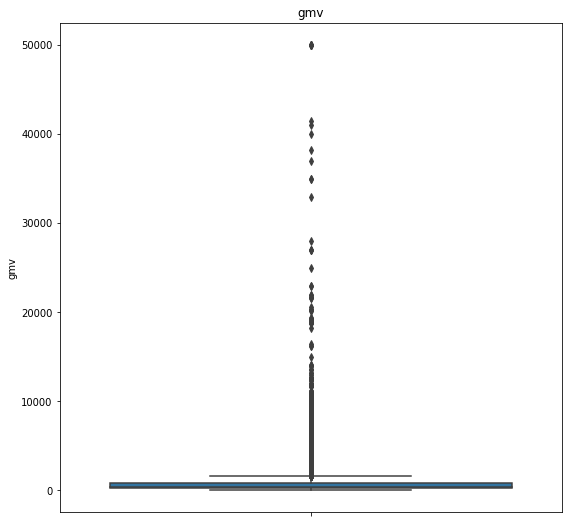

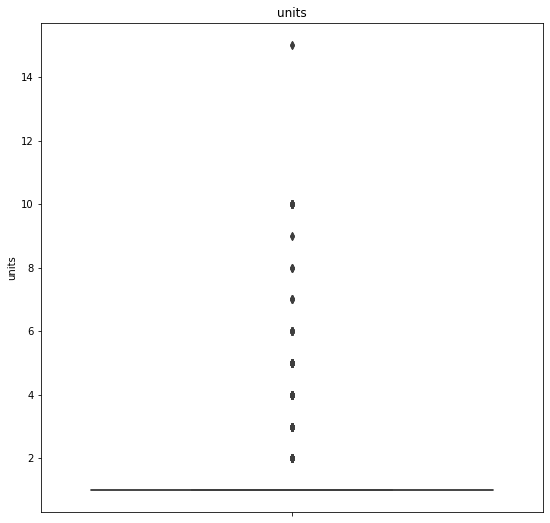

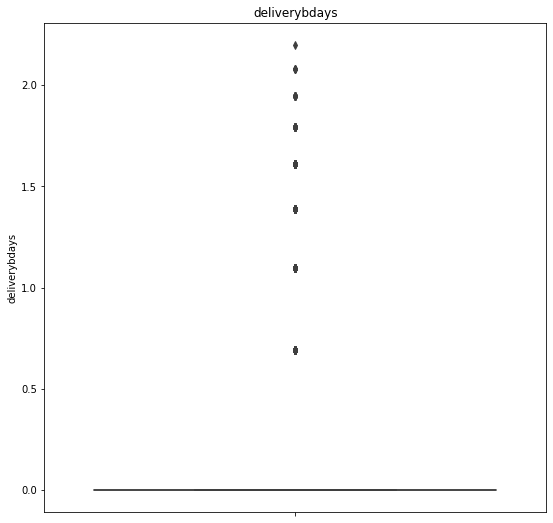

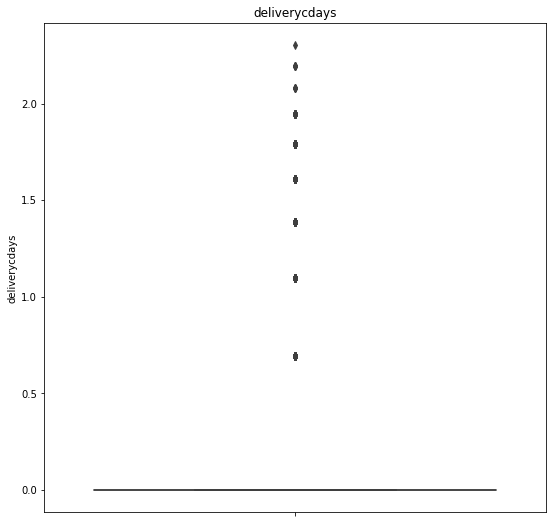

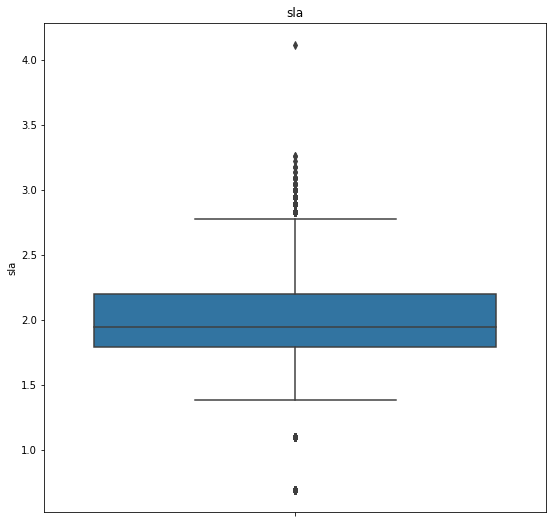

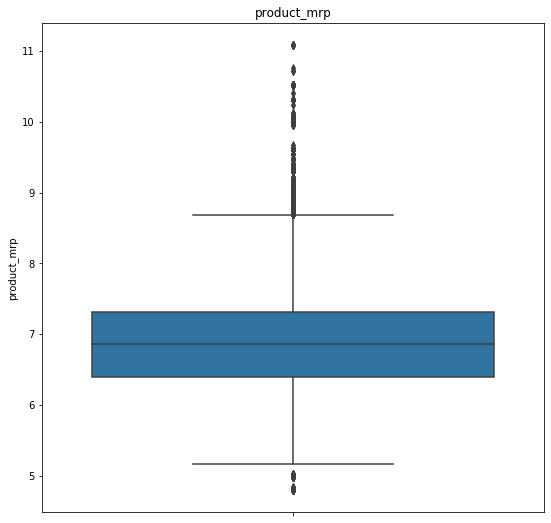

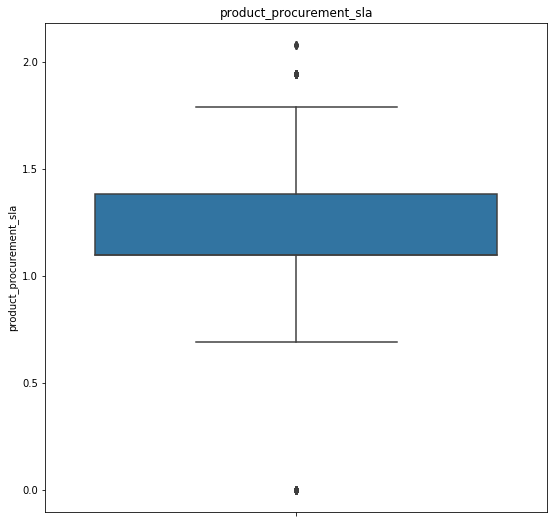

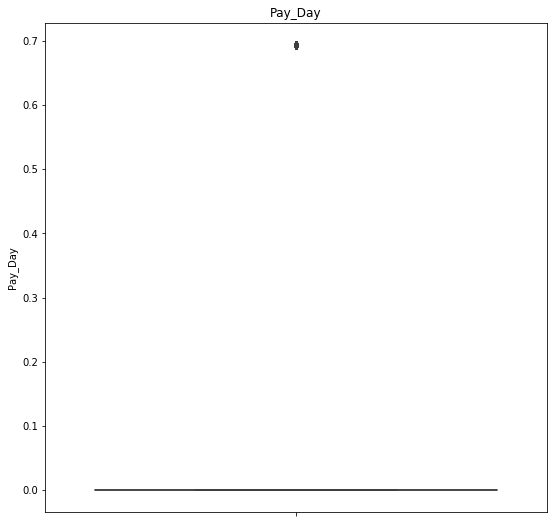

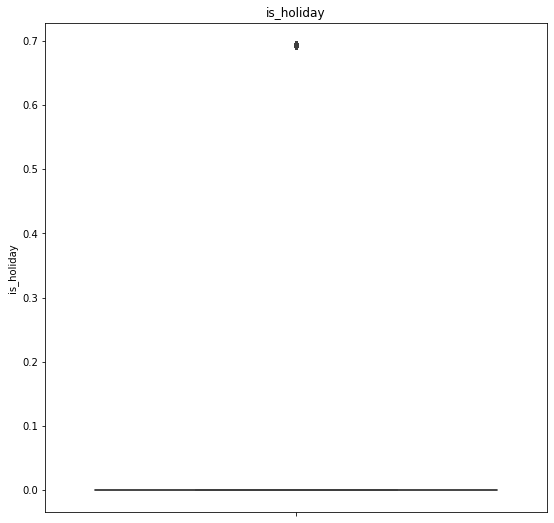

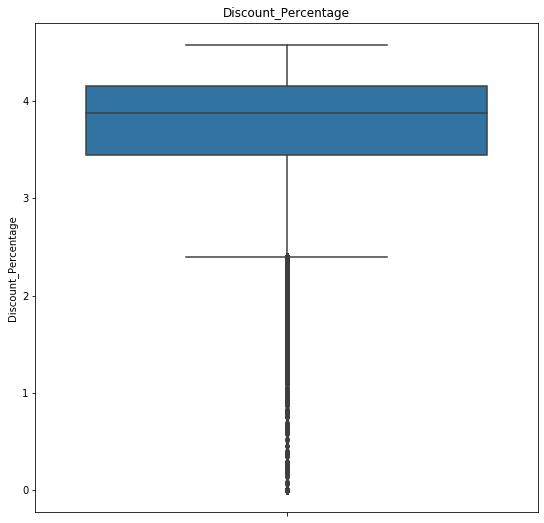

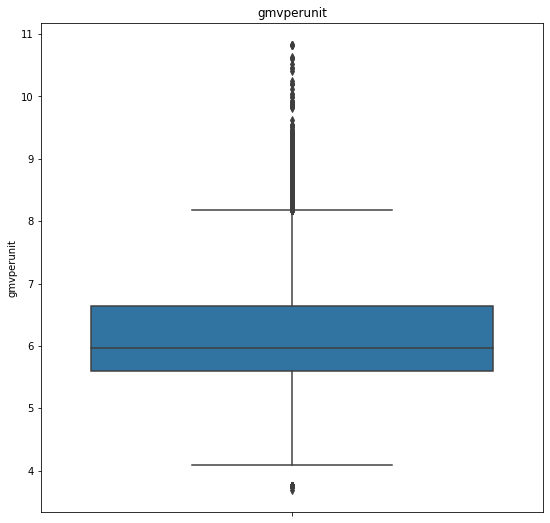

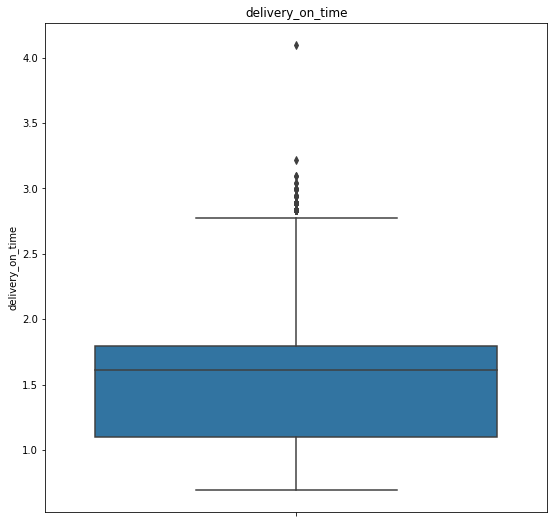

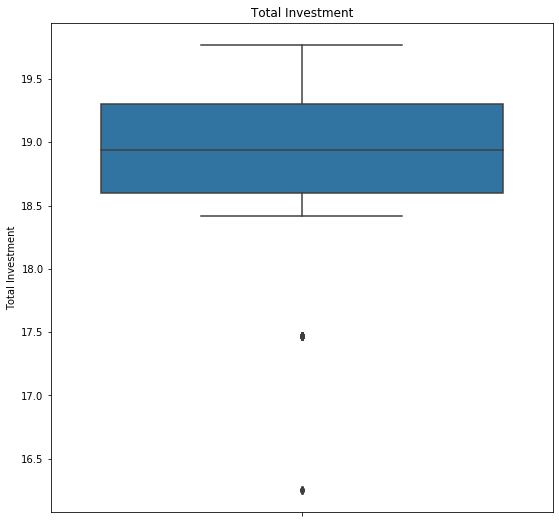

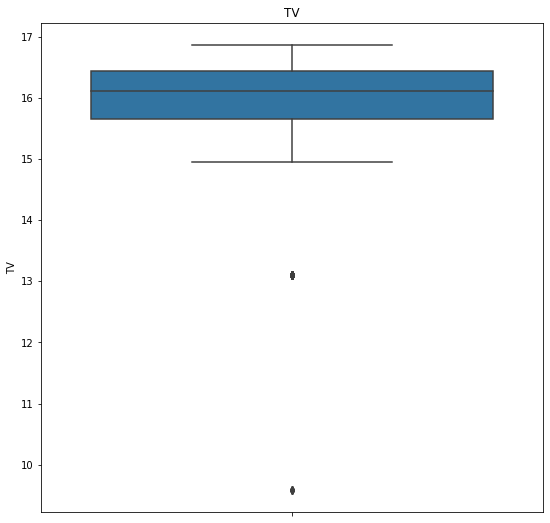

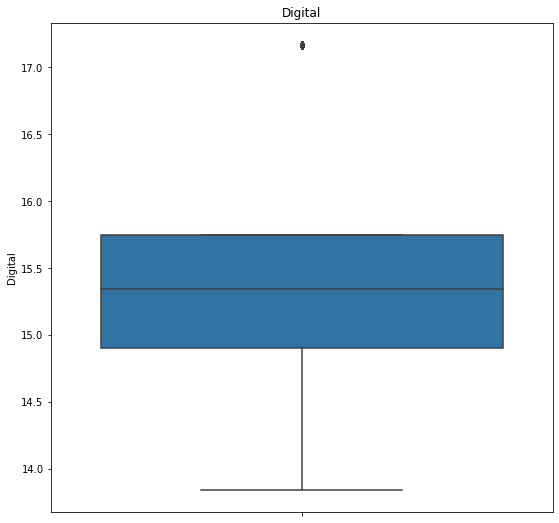

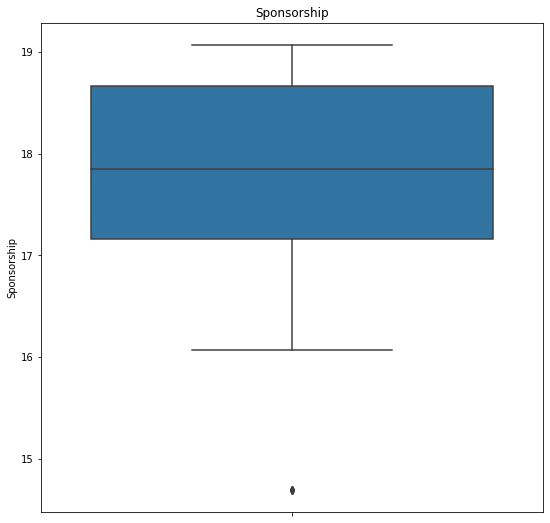

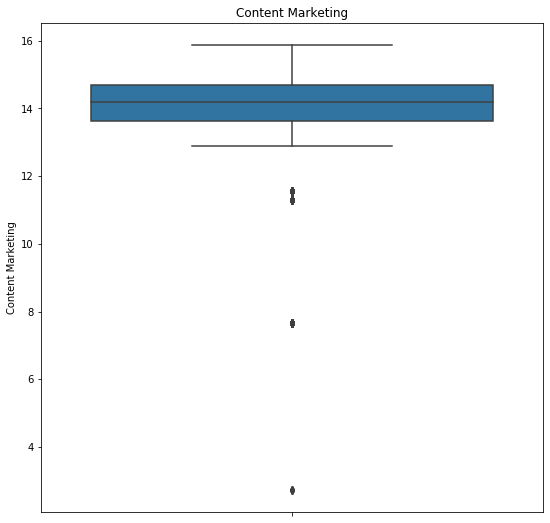

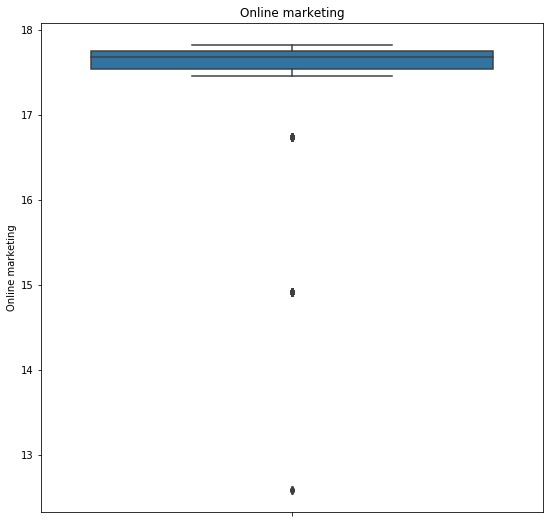

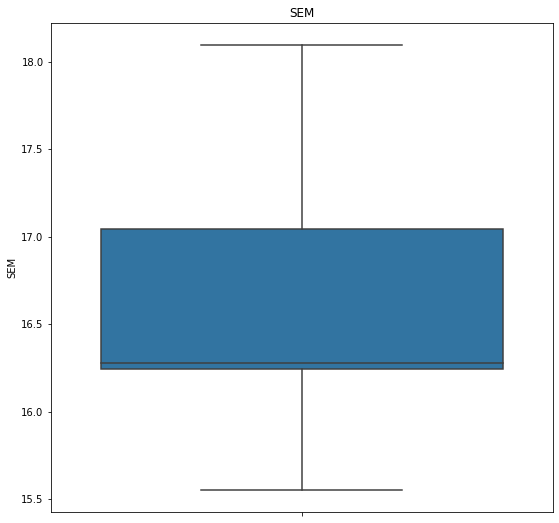

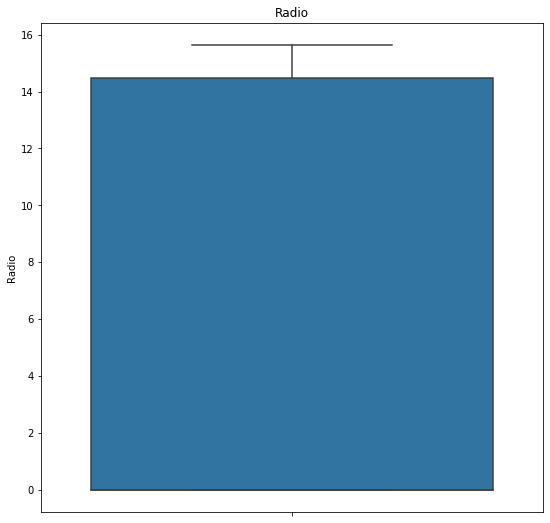

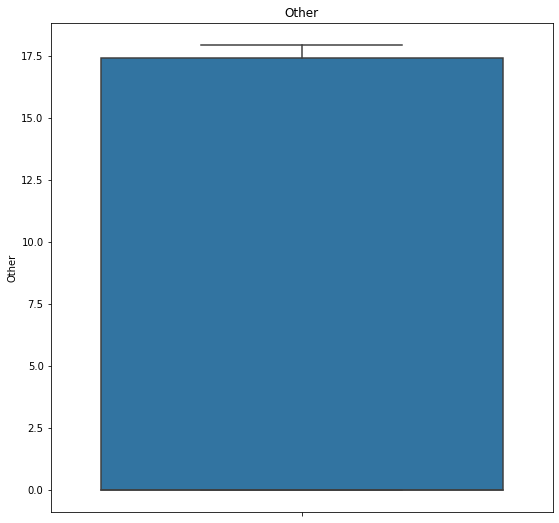

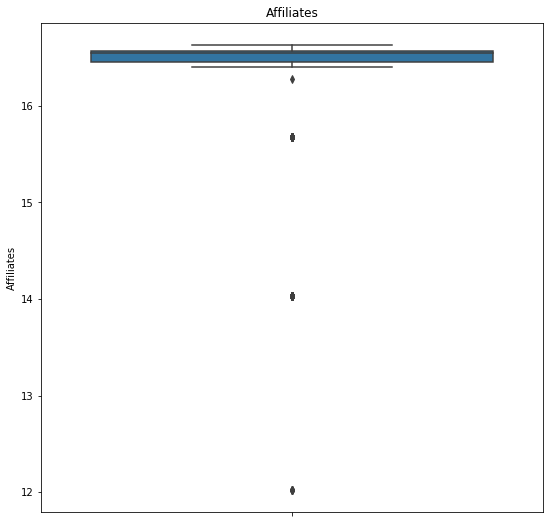

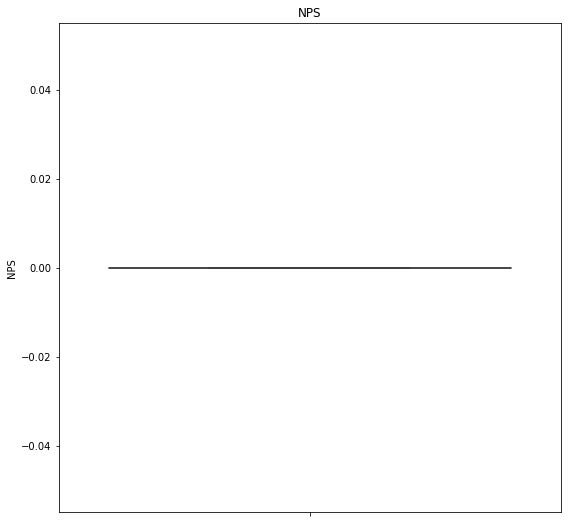

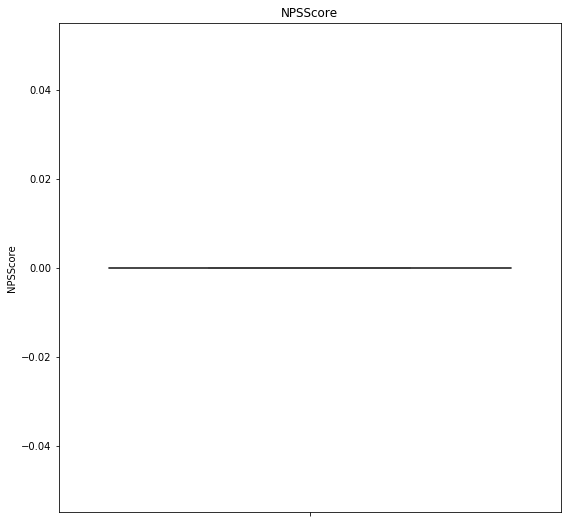

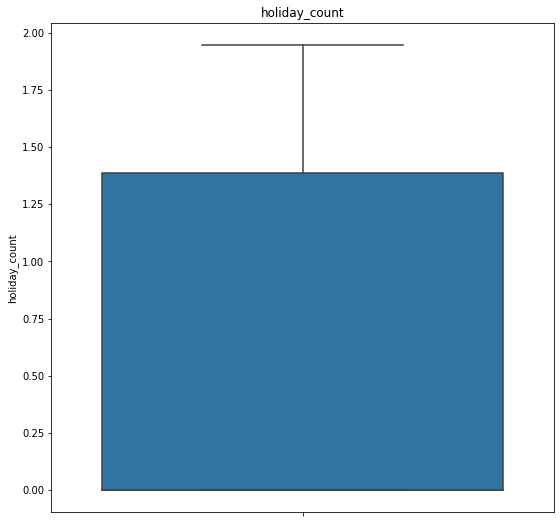

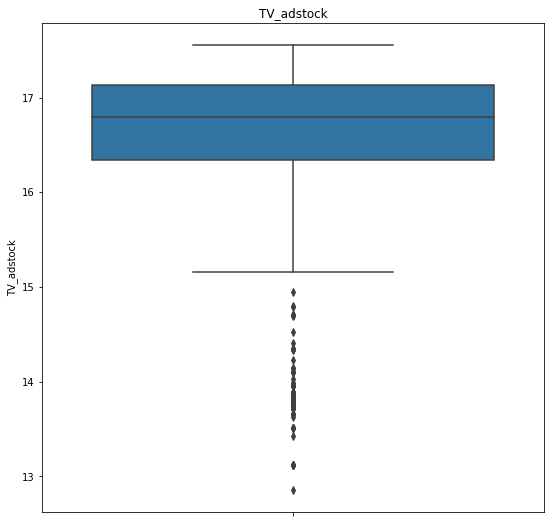

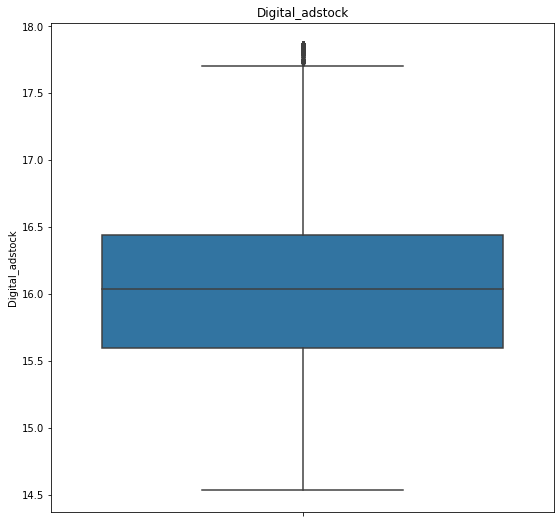

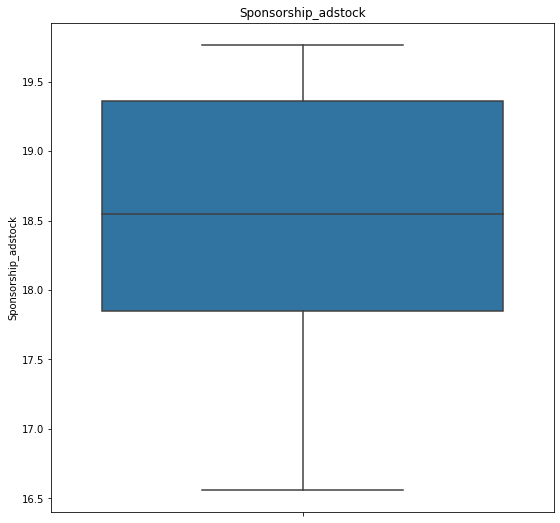

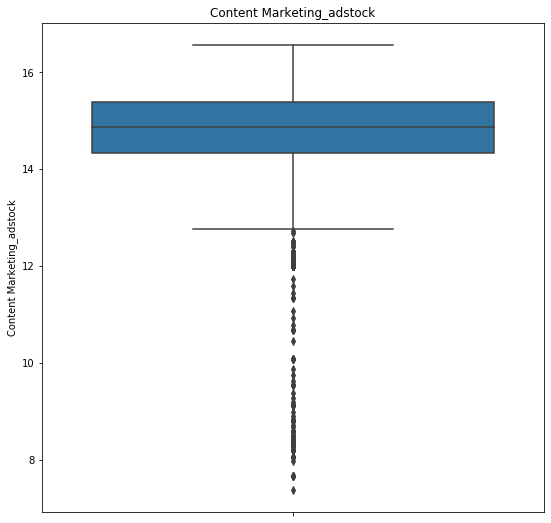

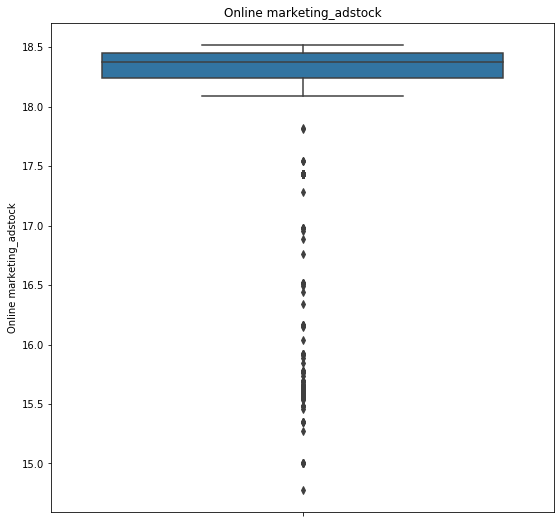

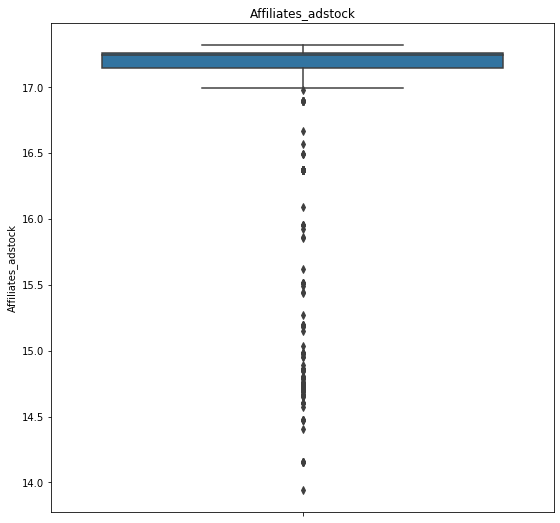

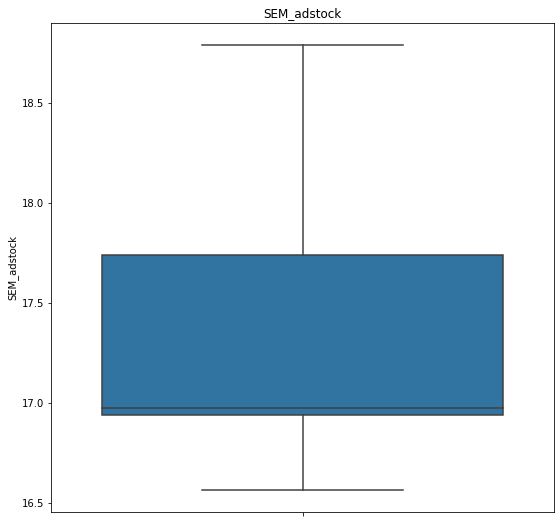

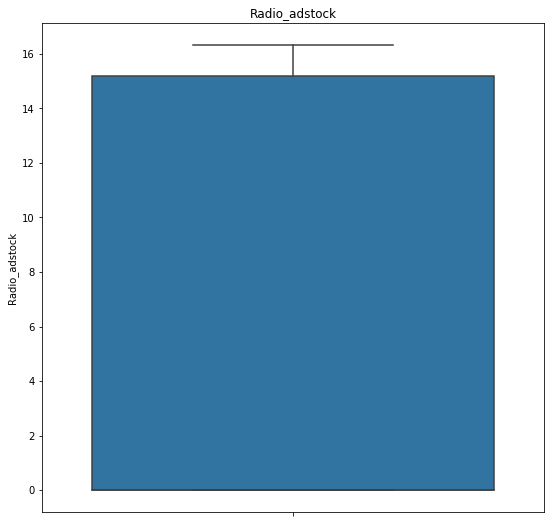

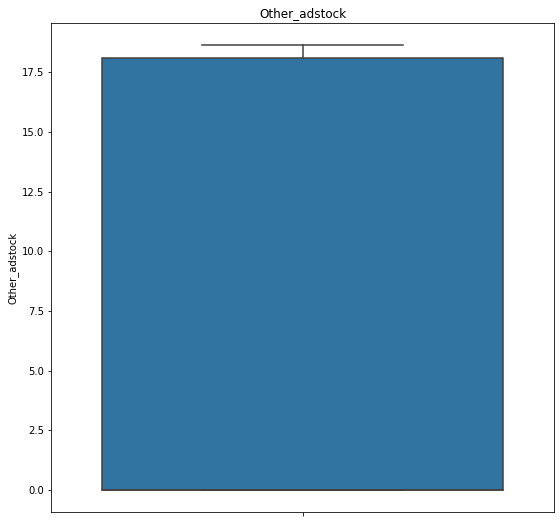

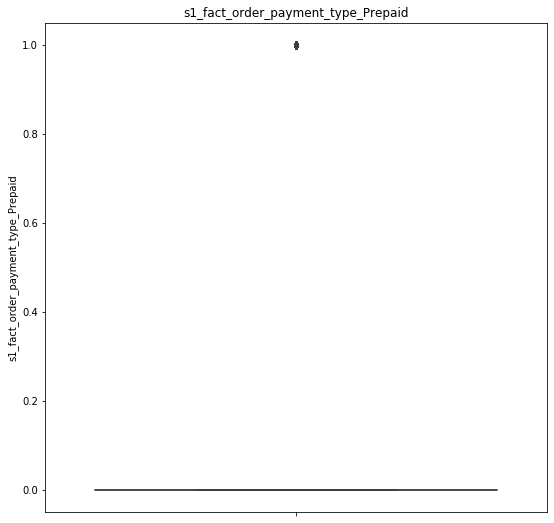

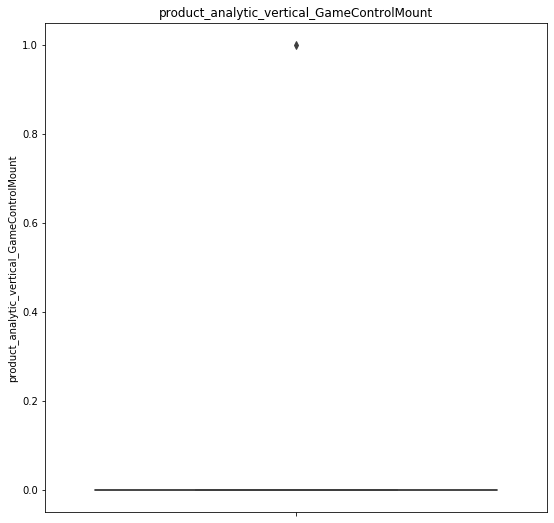

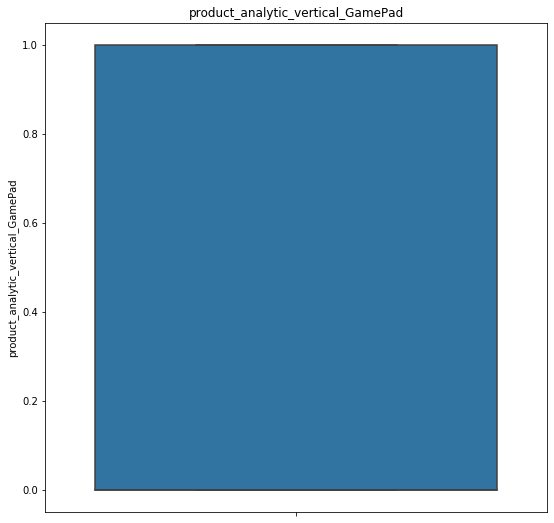

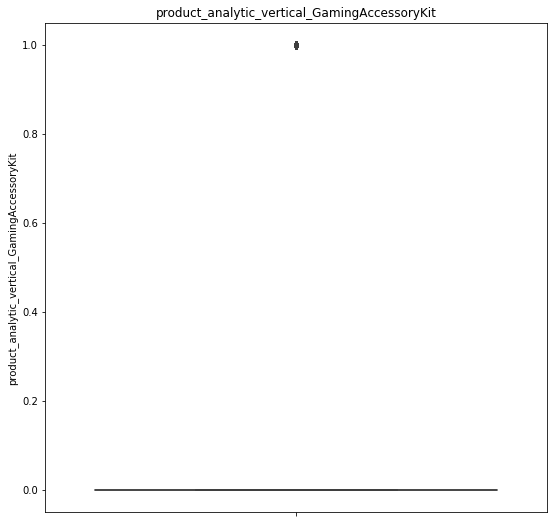

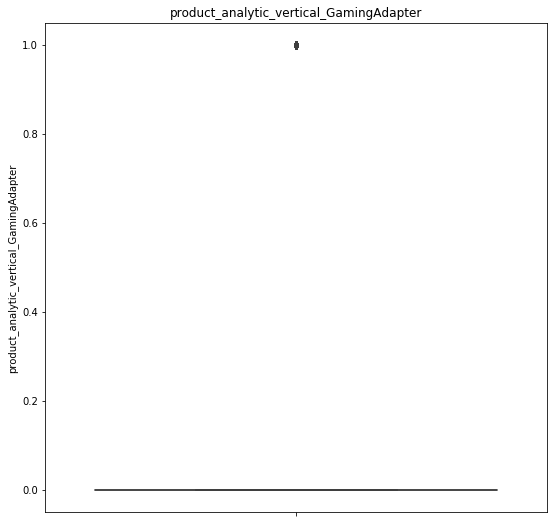

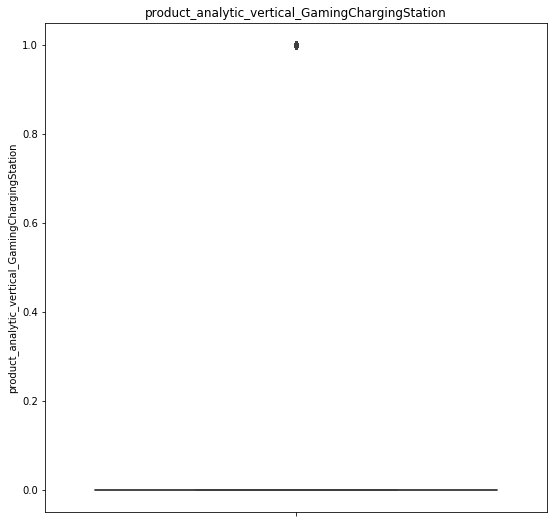

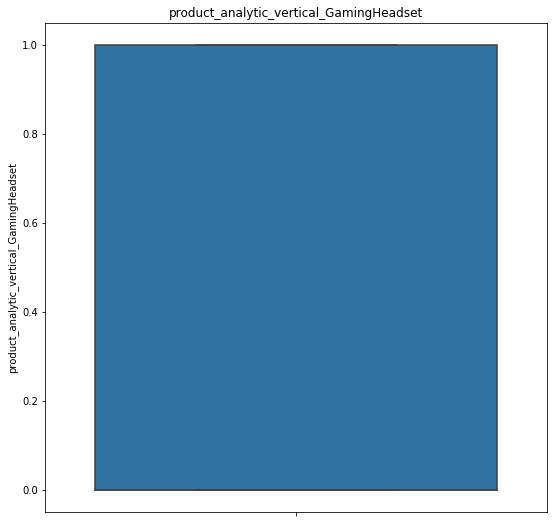

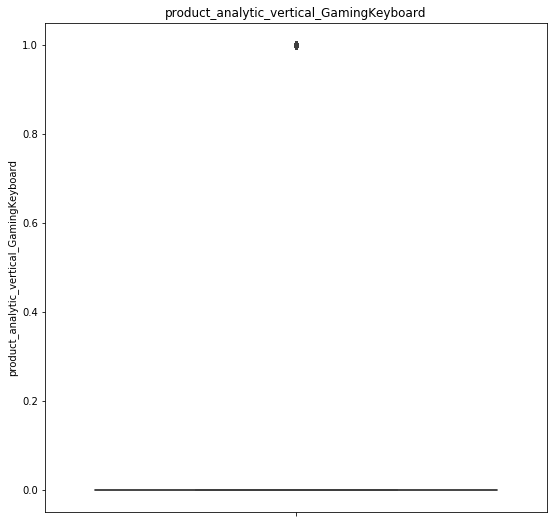

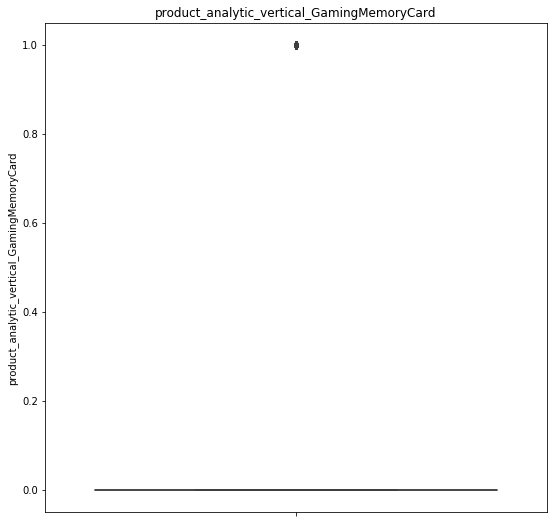

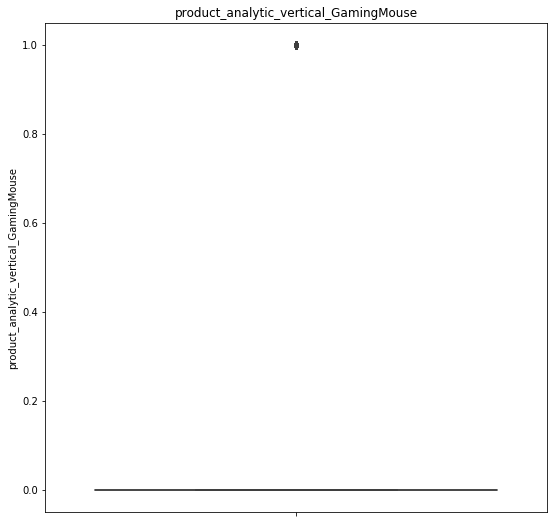

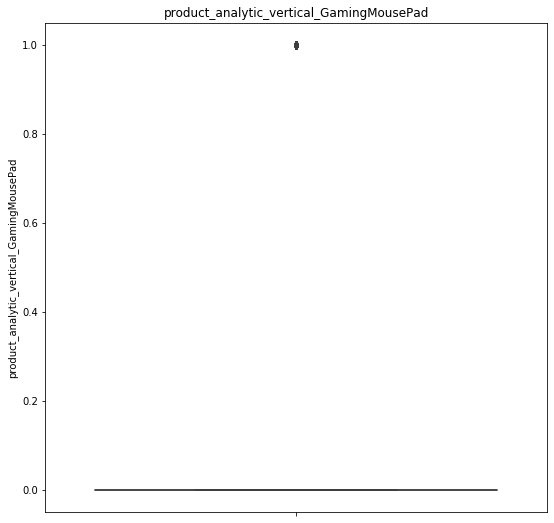

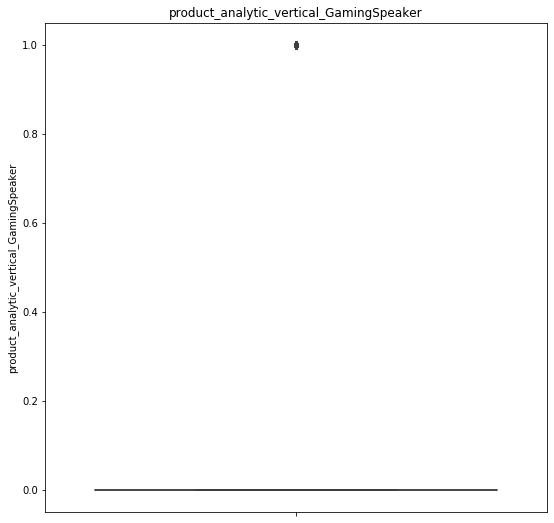

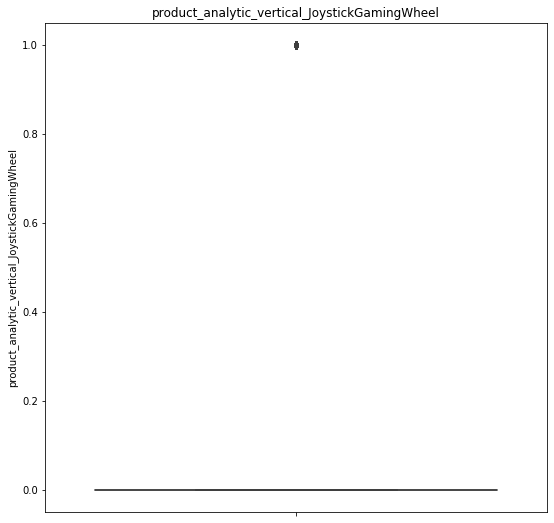

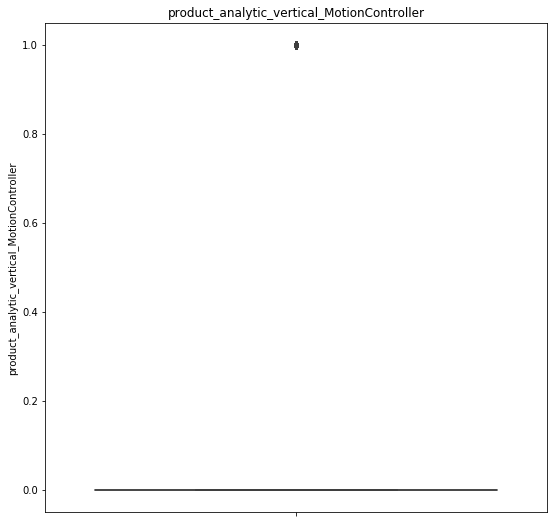

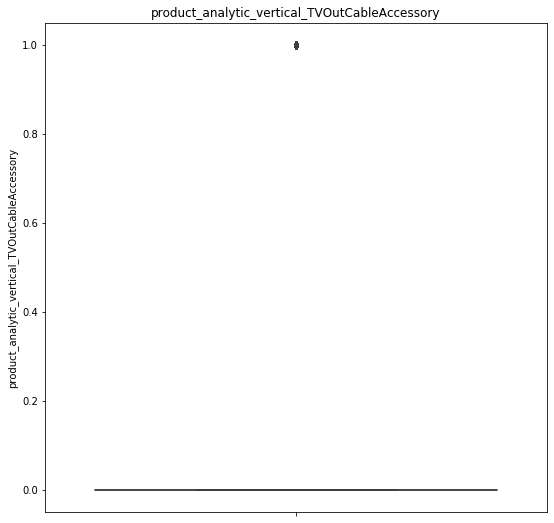

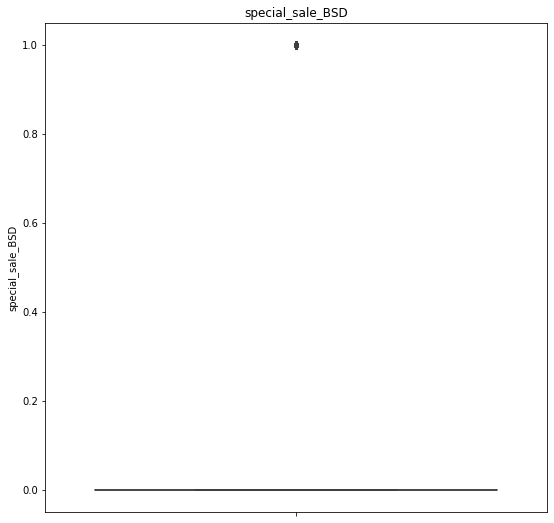

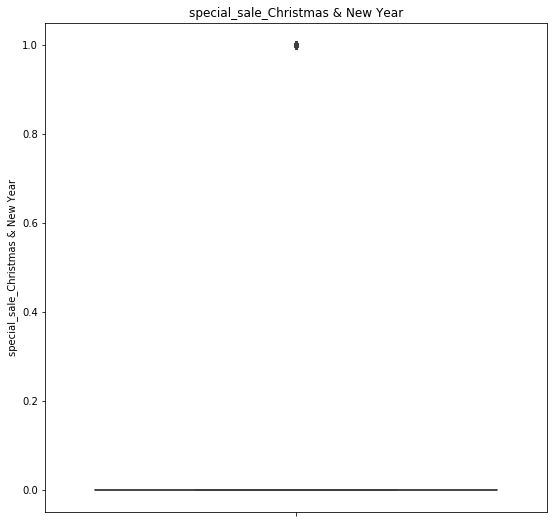

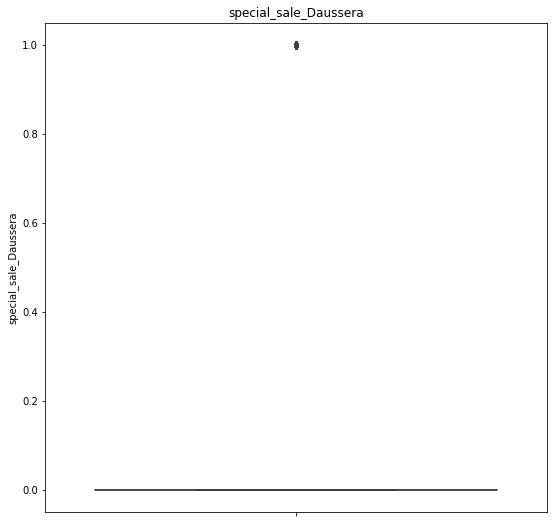

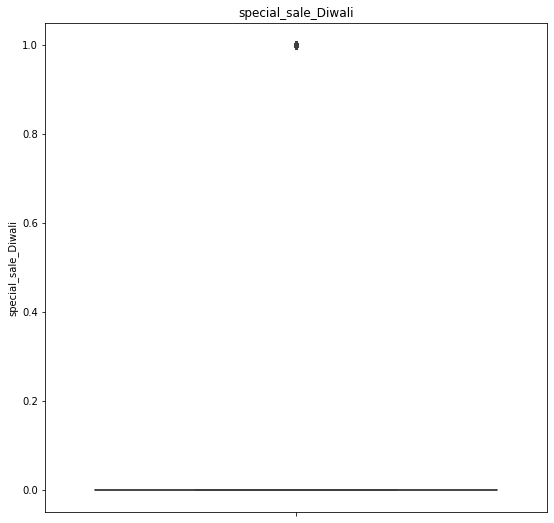

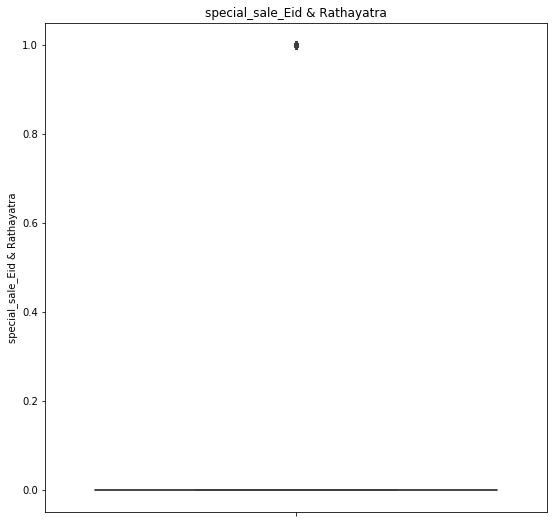

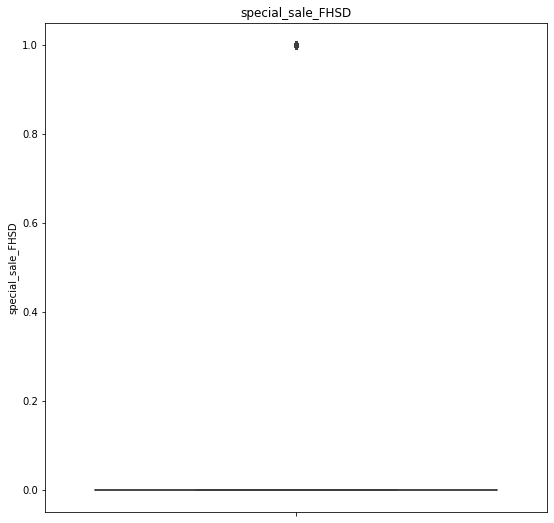

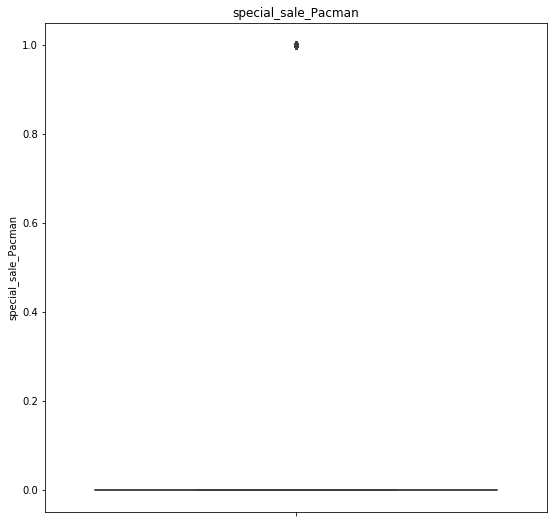

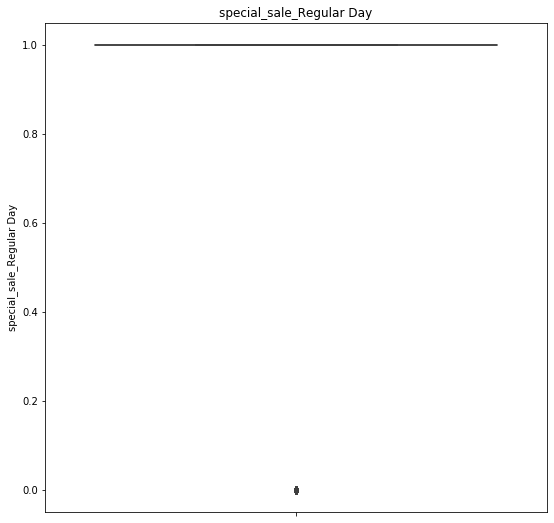

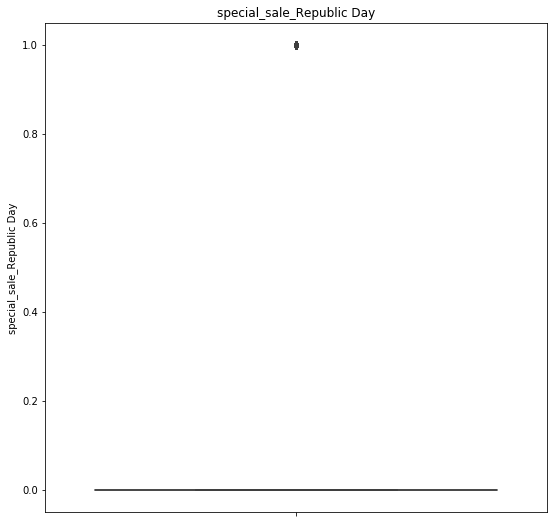

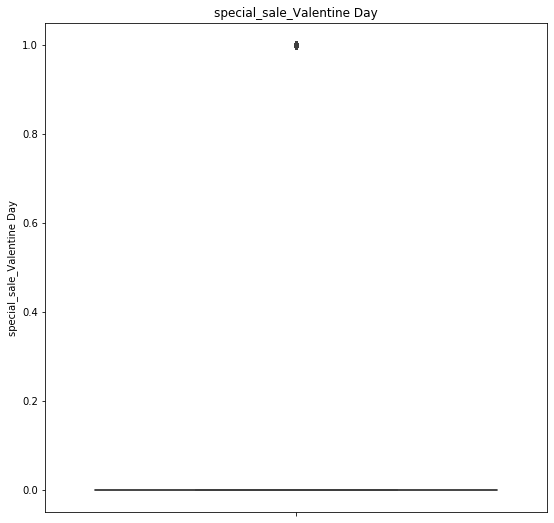

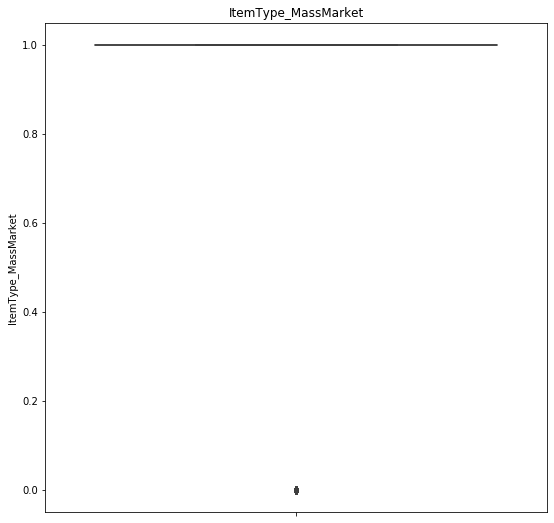

In [30]:
#Checking outliers in dataframe
for col in list(ecart_CA.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=ecart_CA, y=col).set_title(col)

In [31]:
#function for outlier treatment
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [32]:
#removing outliers
ecart_CA = remove_outlier(ecart_CA, 'gmv')
ecart_CA.shape

(95514, 60)

In [33]:
#removing outliers
ecart_CA = remove_outlier(ecart_CA, 'Discount_Percentage')
ecart_CA.shape

(90911, 60)

In [34]:
#removing outliers
ecart_CA = remove_outlier(ecart_CA, 'sla')
ecart_CA.shape

(89022, 60)

In [35]:
#removing outliers
ecart_CA = remove_outlier(ecart_CA, 'Affiliates')
ecart_CA.shape

(53989, 60)

In [36]:
# Import the required library

from sklearn.model_selection import train_test_split

In [37]:
#train-test split 
df_train, df_test = train_test_split(ecart_CA, train_size=0.7, test_size=0.3, random_state=100)

In [38]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
# Create a list of the variables that you need to scale
varlist = []
dum_cols = list(ecart_CA_dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in ecart_CA.columns:
    if col not in dum_cols:
        varlist.append(col)

In [41]:
varlist

['gmv',
 'units',
 'deliverybdays',
 'deliverycdays',
 'sla',
 'product_mrp',
 'product_procurement_sla',
 'Discount_Percentage',
 'gmvperunit',
 'delivery_on_time',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 'SEM',
 'Radio',
 'Other',
 'Affiliates',
 'NPS',
 'NPSScore',
 'holiday_count',
 'TV_adstock',
 'Digital_adstock',
 'Sponsorship_adstock',
 'Content Marketing_adstock',
 'Online marketing_adstock',
 'Affiliates_adstock',
 'SEM_adstock',
 'Radio_adstock',
 'Other_adstock']

In [42]:
# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [43]:
# Let's take a look at the train dataframe now
df_train.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
80555,0.36,0.00,0.00,0.00,0.29,0.77,0.53,0.00,0.00,0.92,...,0,0,0,0,0,0,1,0,0,1
23291,0.23,0.00,0.00,0.00,0.40,0.50,0.53,0.00,0.00,0.78,...,0,0,0,0,0,0,1,0,0,1
252,0.82,0.00,0.00,0.00,0.50,0.80,0.33,0.69,0.69,0.80,...,0,1,0,0,0,0,0,0,0,1
31715,0.13,0.00,0.00,0.00,0.29,0.34,0.53,0.00,0.00,0.71,...,0,0,0,0,0,0,1,0,0,1
33633,0.24,0.00,0.00,0.00,0.40,0.49,0.53,0.00,0.69,0.75,...,0,0,1,0,0,0,0,0,0,1


In [44]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [45]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [46]:
#Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.32707594e+00 -2.23643565e-01  6.28491238e-02  1.77460455e-01
  5.00520467e-01 -1.40060670e-01  2.06489419e-02 -2.13996443e-03
 -1.36260254e-01  8.00631287e-01 -1.76825842e-01 -3.86839816e+11
  7.86100311e+10  3.41679323e+11  7.21865146e+10  6.28577804e+11
 -7.54627274e+11  3.08386154e+11  3.40481340e+11  1.39098781e+11
 -1.75408572e+11  8.35069195e+10  4.68273777e+09  3.27939967e-03
 -6.36337698e-02 -2.24900253e-01  9.90487800e-02 -5.24520203e-02
 -1.09548649e-01  8.68468620e-02  3.11589195e-01 -7.33355642e-02
  7.92537051e-02  1.92343933e-03 -4.49596064e+09 -5.99804369e-03
 -2.50147709e-03 -1.72596690e-02  1.10495192e-01 -4.84790024e-02
 -3.02160207e-02 -4.71072507e-02 -2.68570732e-02 -3.63354405e-02
 -7.21558929e-02 -4.67868131e-02  8.90306109e-02  2.06590611e-03
 -2.44140625e-04 -6.76878730e-03 -3.68480826e-04 -4.07716930e-03
  0.00000000e+00 -1.71940228e-04 -3.00099229e-03  5.05790187e-04
  0.00000000e+00 -2.46203846e-03  0.00000000e+00]
-112564164243.59526


In [48]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe1 = RFE(lm, 12)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True False False False False False False False False  True False  True
  True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
[ 1  5 30  3  2  6 29 35  7  1  4  1  1  1  1  1  1  1  1  1  1 14 16 36
 19 13 18 23 15 17 10 12 11 40 27 34 41 31  8 21 26 22 28 25 20 24  9 32
 45 33 44 37 47 43 38 42 46 39 48]


In [49]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 12 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,gmvperunit,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates
80555,1.00,0.00,0.73,0.00,0.47,0.35,0.00,0.43,0.27,0.00,0.00,0.00,0.64
23291,1.00,0.00,0.63,0.02,0.77,0.19,0.08,0.00,0.00,0.02,0.00,0.00,0.09
252,1.00,0.00,0.95,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00
31715,1.00,0.00,0.49,0.02,0.77,0.19,0.08,0.00,0.00,0.02,0.00,0.00,0.09
33633,1.00,0.00,0.64,0.02,0.77,0.19,0.08,0.00,0.00,0.02,0.00,0.00,0.09


In [50]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 3.317e+04
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:42:02   Log-Likelihood:                 47063.
No. Observations:               37792   AIC:                        -9.411e+04
Df Residuals:                   37782   BIC:                        -9.402e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.146e+09    1.7e+1

In [51]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [69]:
# Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
9,Radio,"40,229,568,568.93"
10,Other,"40,229,568,568.93"
5,Sponsorship,"115,509.39"
7,Online marketing,"34,261.36"
11,Affiliates,"20,023.44"
3,TV,"3,630.20"
6,Content Marketing,"1,471.94"
4,Digital,790.07
8,SEM,590.05
1,units,1.01


In [70]:
X_train_rfe1 = X_train_rfe1.drop('Radio', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 3.742e+04
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:51:40   Log-Likelihood:                 47110.
No. Observations:               37792   AIC:                        -9.420e+04
Df Residuals:                   37783   BIC:                        -9.412e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.946e+09    1.3e+10      0.613      0.540   -1.75e+10    3.34e+10
units                 1.3572      0.014     98.759      0.000       1.330       1.384
gmvperunit            1.1492      0.002    544.482      0.000       1.145       1.153
TV                -1.013e+10   1.52e+10     -0.666      0.506      -4e+10    1.97e+10
Digital             1.06e+10   1.22e+10      0.868      0.386   -1.33e+10    3.45e+10
Sponsorship       -1.401e+10   2.22e+10     -0.630      0.528   -5.76e+10    2.96e+10
Content Marketing  3.946e+09   9.63e+09      0.410      0.682   -1.49e+10    2.28e+10
Online marketing   1.884e+09    2.5e+09      0.753      0.452   -3.02e+09    6.79e+09
SEM                1.401e+10   2.58e+10      0.543      0.587   -3.65e+10    6.46e+10
Other             -6.909e+09   1.13e+10     -0.614      0.539    -2.9e+10    1.52e+10
Affiliates        -1.425e+10   2.13e+10     -0.668      0.504    -5.6e+10    2.75e+10
==============================================================================
Omnibus:                     8278.416   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17746.717
Skew:                           1.278   Prob(JB):                         0.00
Kurtosis:                       5.178   Cond. No.                     2.96e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
9,Other,"42,928,220,640.27"
5,Sponsorship,"127,491.84"
3,TV,"4,791.09"
7,Online marketing,"4,038.30"
4,Digital,"1,362.63"
10,Affiliates,"1,034.23"
8,SEM,255.81
6,Content Marketing,204.84
1,units,1.01
2,gmvperunit,1.00


In [72]:
# X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Other', axis=1)

lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 3.685e+04
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:52:38   Log-Likelihood:                 46853.
No. Observations:               37792   AIC:                        -9.369e+04
Df Residuals:                   37783   BIC:                        -9.361e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.957e+09   7.25e+09      0.546      0.585   -1.03e+10    1.82e+10
units                 1.3573      0.014     97.910      0.000       1.330       1.385
gmvperunit            1.1492      0.002    540.790      0.000       1.145       1.153
TV                 -5.64e+09   8.88e+09     -0.635      0.526   -2.31e+10    1.18e+10
Digital            1.417e+10   1.92e+10      0.737      0.461   -2.35e+10    5.19e+10
Sponsorship       -1.508e+10   2.69e+10     -0.561      0.574   -6.77e+10    3.76e+10
Content Marketing  9.436e+09   2.06e+10      0.459      0.647   -3.09e+10    4.98e+10
Online marketing  -3.832e+09   1.02e+10     -0.375      0.708   -2.39e+10    1.62e+10
SEM                1.154e+10   2.44e+10      0.473      0.636   -3.62e+10    5.93e+10
Affiliates        -1.455e+10   2.44e+10     -0.596      0.551   -6.24e+10    3.33e+10
==============================================================================
Omnibus:                     8040.296   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16980.801
Skew:                           1.249   Prob(JB):                         0.00
Kurtosis:                       5.131   Cond. No.                     1.07e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
6,Content Marketing,"1,244,712.64"
5,Sponsorship,"35,287.87"
7,Online marketing,"12,304.83"
4,Digital,"6,968.04"
3,TV,496.15
8,SEM,154.70
9,Affiliates,152.98
1,units,1.01
2,gmvperunit,1.01
0,const,0.00


In [74]:
X_train_rfe1 = X_train_rfe1.drop('Content Marketing', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 4.280e+04
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:58:47   Log-Likelihood:                 47122.
No. Observations:               37792   AIC:                        -9.423e+04
Df Residuals:                   37784   BIC:                        -9.416e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.838e+08    7.4e+08      0.654      0.513   -9.67e+08    1.93e+09
units                1.3567      0.014     98.963      0.000       1.330       1.384
gmvperunit           1.1492      0.002    544.675      0.000       1.145       1.153
TV               -1.324e+09   2.03e+09     -0.654      0.513    -5.3e+09    2.65e+09
Digital           5.273e+09   8.07e+09      0.654      0.513   -1.05e+10    2.11e+10
Sponsorship      -2.535e+09   3.88e+09     -0.654      0.513   -1.01e+10    5.07e+09
Online marketing  8.377e+08   1.28e+09      0.654      0.513   -1.67e+09    3.35e+09
SEM               2.781e+08   4.25e+08      0.654      0.513   -5.56e+08    1.11e+09
Affiliates       -3.014e+09   4.61e+09     -0.654      0.513   -1.21e+10    6.02e+09
==============================================================================
Omnibus:                     8248.317   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17663.603
Skew:                           1.274   Prob(JB):                         0.00
Kurtosis:                       5.175   Cond. No.                     1.18e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.83e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,SEM,"187,493,318.18"
5,Sponsorship,"112,628,964.53"
6,Online marketing,"162,099.58"
3,TV,"106,821.72"
4,Digital,"12,168.65"
8,Affiliates,"6,218.50"
1,units,1.01
2,gmvperunit,1.01
0,const,0.00


In [76]:
# X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
X_train_rfe1 = X_train_rfe1.drop('SEM', axis=1)

lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 4.280e+04
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:59:45   Log-Likelihood:                 47126.
No. Observations:               37792   AIC:                        -9.424e+04
Df Residuals:                   37784   BIC:                        -9.417e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -2.29e+08   2.88e+08     -0.796      0.426   -7.93e+08    3.35e+08
units                1.3568      0.014     98.972      0.000       1.330       1.384
gmvperunit           1.1492      0.002    544.720      0.000       1.145       1.153
TV               -1.744e+08   2.19e+08     -0.796      0.426   -6.04e+08    2.55e+08
Digital           5.119e+09   6.43e+09      0.796      0.426   -7.48e+09    1.77e+10
Sponsorship      -3.859e+09   4.85e+09     -0.796      0.426   -1.34e+10    5.64e+09
Online marketing  2.505e+09   3.15e+09      0.796      0.426   -3.66e+09    8.67e+09
Affiliates       -3.361e+09   4.22e+09     -0.796      0.426   -1.16e+10    4.91e+09
==============================================================================
Omnibus:                     8257.587   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17699.386
Skew:                           1.274   Prob(JB):                         0.00
Kurtosis:                       5.178   Cond. No.                     4.69e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.22e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
3,TV,inf
4,Digital,inf
5,Sponsorship,inf
6,Online marketing,inf
7,Affiliates,inf
1,units,1.01
2,gmvperunit,1.01
0,const,0.00


In [78]:
X_train_rfe1 = X_train_rfe1.drop('Affiliates', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 4.995e+04
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:00:47   Log-Likelihood:                 47128.
No. Observations:               37792   AIC:                        -9.424e+04
Df Residuals:                   37785   BIC:                        -9.418e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4120      0.013    -30.661      0.000      -0.438      -0.386
units                1.3567      0.014     98.977      0.000       1.330       1.384
gmvperunit           1.1492      0.002    544.766      0.000       1.145       1.153
TV                  -0.0381      0.025     -1.535      0.125      -0.087       0.011
Digital              0.0228      0.018      1.234      0.217      -0.013       0.059
Sponsorship          0.0450      0.022      2.041      0.041       0.002       0.088
Online marketing    -0.0376      0.029     -1.289      0.198      -0.095       0.020
==============================================================================
Omnibus:                     8262.612   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17711.928
Skew:                           1.275   Prob(JB):                         0.00
Kurtosis:                       5.178   Cond. No.                         232.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,"1,410.88"
6,Online marketing,876.67
5,Sponsorship,684.23
3,TV,359.32
4,Digital,263.66
1,units,1.01
2,gmvperunit,1.01


In [80]:
X_train_rfe1 = X_train_rfe1.drop('const', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          1.443e+05
Date:                Fri, 26 Mar 2021   Prob (F-statistic):                        0.00
Time:                        01:01:50   Log-Likelihood:                          46664.
No. Observations:               37792   AIC:                                 -9.332e+04
Df Residuals:                   37786   BIC:                                 -9.326e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
units                1.3549      0.014     97.644      0.000       1.328       1.382
gmvperunit           1.1440      0.002    537.418      0.000       1.140       1.148
TV                  -0.7953      0.003   -291.112      0.000      -0.801      -0.790
Digital              0.5820      0.003    187.237      0.000       0.576       0.588
Sponsorship          0.7147      0.003    243.589      0.000       0.709       0.720
Online marketing    -0.9260      0.004   -250.234      0.000      -0.933      -0.919
==============================================================================
Omnibus:                     8008.514   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16941.323
Skew:                           1.243   Prob(JB):                         0.00
Kurtosis:                       5.139   Cond. No.                         52.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
5,Online marketing,39.19
2,TV,34.91
4,Sponsorship,26.27
3,Digital,24.69
1,gmvperunit,13.69
0,units,1.02


In [82]:
X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          6.278e+04
Date:                Fri, 26 Mar 2021   Prob (F-statistic):                        0.00
Time:                        01:02:35   Log-Likelihood:                          28825.
No. Observations:               37792   AIC:                                 -5.764e+04
Df Residuals:                   37787   BIC:                                 -5.760e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
units                1.1128      0.022     50.152      0.000       1.069       1.156
gmvperunit           0.7627      0.002    329.775      0.000       0.758       0.767
TV                  -0.2950      0.003   -102.148      0.000      -0.301      -0.289
Digital              0.2263      0.004     51.435      0.000       0.218       0.235
Online marketing    -0.1354      0.003    -47.507      0.000      -0.141      -0.130
==============================================================================
Omnibus:                     8873.849   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19612.082
Skew:                           1.353   Prob(JB):                         0.00
Kurtosis:                       5.267   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
3,Digital,19.24
2,TV,15.18
4,Online marketing,9.04
1,gmvperunit,6.29
0,units,1.02


In [85]:
# Predicting using the 12th model
y_train_price = lm_6.predict(X_train_rfe1)

Text(0.5, 0, 'errors')

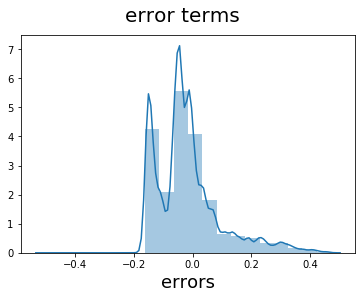

In [86]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)

In [88]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [89]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [90]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [91]:
X_test_rfe2.columns

Index(['units', 'gmvperunit', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'SEM', 'Radio',
       'Other', 'Affiliates'],
      dtype='object')

In [92]:
X_train_rfe1.columns

Index(['units', 'gmvperunit', 'TV', 'Digital', 'Online marketing'], dtype='object')

In [93]:
# Let's now drop the variables we had manually eliminated as well
#X_test_rfe2 =X_test_rfe2[col]
X_test = df_test
X_test_rfe2 = X_test_rfe2[X_train_rfe1.columns]

In [94]:
X_test_rfe2.columns

Index(['units', 'gmvperunit', 'TV', 'Digital', 'Online marketing'], dtype='object')

In [95]:
# Add a constant to the test set created
#X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 10348 to 86151
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   units             16197 non-null  float64
 1   gmvperunit        16197 non-null  float64
 2   TV                16197 non-null  float64
 3   Digital           16197 non-null  float64
 4   Online marketing  16197 non-null  float64
dtypes: float64(5)
memory usage: 759.2 KB


In [96]:
# Making predictions
y_pred = lm_6.predict(X_test_rfe2)

In [97]:
print(X_test_rfe2.shape)
print(X_train_rfe1.shape)

(16197, 5)
(37792, 5)


Text(0, 0.5, 'y_pred')

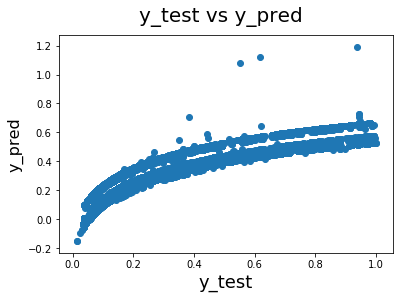

In [98]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [99]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7030366880859036

In [100]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [101]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.11390388086758475

In [102]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [103]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
regr.score(X_test, y_test)

0.9160231612654309

In [105]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)

Cross Validation scores:  [0.91415674 0.91584017 0.9157235  0.9149337  0.91728024]
Mean and std deviation:  0.915586872371998 0.0010413673629908445


0.9160231612654309

In [106]:
accuracy

0.914955155092857